# Classifying Urban sounds using Deep Learning

## 3 Model Training and Evaluation 

### Load Preprocessed data 

In [1]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

In [2]:
yy

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [3]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [4]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

In [5]:
import numpy as np
import librosa
import pandas as pd
import os
metadata = pd.read_csv('./metadata_compiled.csv')
X_=[]
y_=[]
#dir_= './clinical/converted_seg/cneg/'
for index, row in metadata.iterrows():
    if row["status"] == "healthy":
        file_name = os.path.join(os.path.abspath('./improved_dataset'),str(row["uuid"]+".wav"))
        # for soundDir in (os.listdir(dir_)):
        data_x, sampling_rate = librosa.load(file_name,res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs)
        y_.append('healthy')
    else:
        p='COVID-19'
        
        file_name = os.path.join(os.path.abspath('./improved_dataset'),str(row["uuid"]+".wav"))
        # for soundDir in (os.listdir(dir_)):
        data_x, sampling_rate = librosa.load(file_name,res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs)
        y_.append(p)

        data_noise = add_noise(data_x,0.005)
        mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs_noise)
        y_.append(p)

        data_shift = shift(data_x,1600)
        mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs_shift)
        y_.append(p)

        data_stretch = stretch(data_x,1.2)
        mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs_stretch)
        y_.append(p)

        data_stretch_2 = stretch(data_x,0.8)
        mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0) 
        X_.append(mfccs_stretch_2)
        y_.append(p)

In [6]:
# import numpy as np
# import librosa
# import os

# dir_= './clinical/converted_seg/cpos/'
# p='positive'
# for soundDir in (os.listdir(dir_)):
#     data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
#     mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0) 
#     X_.append(mfccs)
#     y_.append('positive')

#     data_noise = add_noise(data_x,0.005)
#     mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0) 
#     X_.append(mfccs_noise)
#     y_.append(p)

#     data_shift = shift(data_x,1600)
#     mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0) 
#     X_.append(mfccs_shift)
#     y_.append(p)

#     data_stretch = stretch(data_x,1.2)
#     mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0) 
#     X_.append(mfccs_stretch)
#     y_.append(p)

#     data_stretch_2 = stretch(data_x,0.8)
#     mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0) 
#     X_.append(mfccs_stretch_2)
#     y_.append(p)

In [7]:
X = np.array(X_)
y = np.array(y_)

In [8]:
print(X)
print(y)

[[-5.63286072e+02  1.82369003e+01 -2.34143949e+00 ...  2.08231524e-01
  -3.72024238e-01  1.91061288e-01]
 [-7.36395081e+02  5.60351982e+01  9.28143120e+00 ... -1.26430750e-01
   8.30247402e-01  9.10993099e-01]
 [-2.79818207e+02  1.02286911e+02 -2.72372284e+01 ... -3.43401885e+00
  -2.21963358e+00 -1.87745678e+00]
 ...
 [-4.77796448e+02  3.58470688e+01 -5.85082474e+01 ... -2.01891646e-01
  -2.20986962e-01  2.13427007e-01]
 [-4.71484192e+02  3.25430870e+01 -5.61231918e+01 ... -5.69744349e-01
  -4.61468399e-01 -6.55625939e-01]
 [-2.65285828e+02  1.31167923e+02 -4.36617393e+01 ...  1.49560201e+00
   9.85208750e-01 -8.23351368e-02]]
['healthy' 'healthy' 'healthy' ... 'COVID-19' 'COVID-19' 'healthy']


In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
# X = np.array(featuresdf.feature.tolist())
# y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
print(yy)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [10]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42)

In [11]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [16]:
%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

### Initial model architecture - MLP

We will start with constructing a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend. 

Starting with a `sequential` model so we can build the model layer by layer. 

We will begin with a simple model architecture, consisting of three layers, an input layer, a hidden layer and an output layer. All three layers will be of the `dense` layer type which is a standard layer type that is used in many cases for neural networks. 

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40. 

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the `ReLU`, or `Rectified Linear Activation`. This activation function has been proven to work well in neural networks.

We will also apply a `Dropout` value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 2 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is `softmax`. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [17]:
print(yy.shape[1])

2


In [18]:
print(x_train.shape[0])

21842


In [19]:
import numpy as np
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


num_labels = yy.shape[1]
filter_size = 1


# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.20))


model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.20))


model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.20))


model.add(Dense(num_labels))
model.add(Activation('softmax'))



### Compiling the model 

For compiling our model, we will use the following three parameters: 

* Loss function - we will use `categorical_crossentropy`. This is the most common choice for classification. A lower score indicates that the model is performing better.

* Metrics - we will use the `accuracy` metric which will allow us to view the accuracy score on the validation data when we train the model. 

* Optimizer - here we will use `adam` which is a generally good optimizer for many use cases.


In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [21]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)              

### Training 

Here we will train the model. 

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point. 

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model. 

In [22]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 130
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.h5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/130
683/683 [==============================] - 3s 4ms/step - loss: 0.7258 - accuracy: 0.5793 - val_loss: 0.6753 - val_accuracy: 0.5945

Epoch 00001: val_loss improved from inf to 0.67527, saving model to saved_models\weights.best.basic_mlp.h5
Epoch 2/130
683/683 [==============================] - 2s 3ms/step - loss: 0.6740 - accuracy: 0.5983 - val_loss: 0.6755 - val_accuracy: 0.5945

Epoch 00002: val_loss did not improve from 0.67527
Epoch 3/130
683/683 [==============================] - 2s 3ms/step - loss: 0.6731 - accuracy: 0.5998 - val_loss: 0.6734 - val_accuracy: 0.5945

Epoch 00003: val_loss improved from 0.67527 to 0.67337, saving model to saved_models\weights.best.basic_mlp.h5
Epoch 4/130
683/683 [==============================] - 3s 4ms/step - loss: 0.6722 - accuracy: 0.6008 - val_loss: 0.6758 - val_accuracy: 0.5945

Epoch 00004: val_loss did not improve from 0.67337
Epoch 5/130
683/683 [==============================] - 2s 3ms/step - loss: 0.6702 - accuracy: 0.5998 - v

### Test the model 

Here we will review the accuracy of the model on both the training and test data sets. 

In [23]:
model.save('saved_models/mlp_ka_sapna')

INFO:tensorflow:Assets written to: saved_models/mlp_ka_sapna\assets


In [24]:
# Evaluating the model on the training and testing set
model=load_model('saved_models/mlp_ka_sapna')

training_accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", training_accuracy[1])

testing_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Testing Accuracy: ", testing_accuracy[1])

Training Accuracy:  0.6024631261825562
Testing Accuracy:  0.5945310592651367


The initial Training and Testing accuracy scores are quite high. As there is not a great difference between the Training and Test scores (~5%) this suggests that the model has not suffered from overfitting. 

In [30]:
#predicted_vector = model.predict(x_test)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
predict_x=model.predict(x_test) 
predicted_vector=np.argmax(predict_x,axis=1)
le = LabelEncoder()
yy_pred = to_categorical(le.fit_transform(predicted_vector)) 
print(predict_x)

[[0.5484351  0.45156488]
 [0.5484351  0.45156488]
 [0.99102205 0.00897799]
 ...
 [0.5484351  0.45156488]
 [0.5484351  0.45156488]
 [0.5484351  0.45156488]]


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


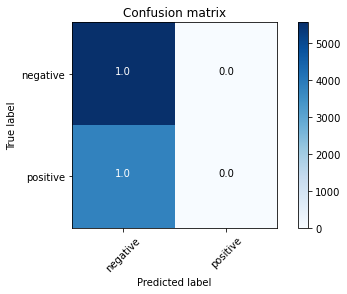

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    np.set_printoptions(precision=2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix=confusion_matrix(y_test.argmax(axis=1),yy_pred.argmax(axis=1))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, ['negative','positive'],
                      'Confusion matrix, without normalization')
plt.show()




In [29]:
print(classification_report(yy_pred.argmax(axis=1),y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75      9362
           1       0.00      0.00      0.00         0

    accuracy                           0.59      9362
   macro avg       0.50      0.30      0.37      9362
weighted avg       1.00      0.59      0.75      9362



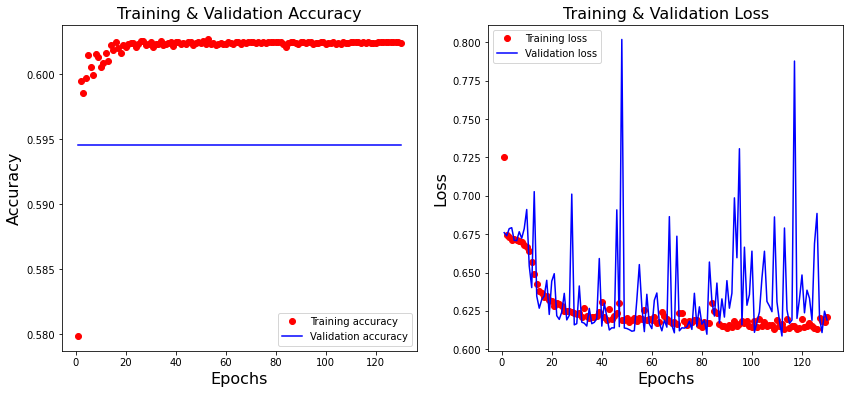

In [24]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'ro', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'ro', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

### Predictions  

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file. 

In [25]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])


In [26]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    #predicted_vector = model.predict_classes(prediction_feature)
    predict_x=model.predict(prediction_feature) 
    predicted_vector=np.argmax(predict_x,axis=1)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation 

#### Test with sample data 

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly. 

In [27]:
# Class: neg

filename = './clinical/converted/neg/neg-0421-088-cough-f-66.wav' 
print_prediction(filename) 

C:\Users\yajwi\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error encountered while parsing file:  ./clinical/converted/neg/neg-0421-088-cough-f-66.wav


ValueError: Failed to find data adapter that can handle input: (<class 'tuple'> containing values of types {"<class 'NoneType'>"}), <class 'NoneType'>

In [ ]:
# Class: positive

filename = './clinical/converted/pos/pos-0421-094-cough-m-51.wav'
print_prediction(filename) 

In [ ]:
# # Class: Street music 

# filename = '../UrbanSound Dataset sample/audio/101848-9-0-0.wav'
# print_prediction(filename) 

In [ ]:
#  Class: Car Horn 

# filename = '../UrbanSound Dataset sample/audio/100648-1-0-0.wav'
# print_prediction(filename) 

#### Observations 

From this brief sanity check the model seems to predict well. One errror was observed whereby a car horn was incorrectly classifed as a dog bark. 

We can see from the per class confidence that this was quite a low score (43%). This allows follows our early observation that a dog bark and car horn are similar in spectral shape. 

### Other audio

Here we will use a sample of various copyright free sounds that we not part of either our test or training data to further validate our model. 

In [ ]:
#filename = '../Evaluation audio/pos/az5zELVN7ObicxGrBLMoX8ki1LF2_shallow_1.wav'
#print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Tanya(20-4-2021).wav'

print_prediction(filename) 

In [ ]:
#filename = '../Evaluation audio/pos/Fi2lLmV3LHR5brvXs0z1JSKDvnI2_heavy_1.wav'

#print_prediction(filename) 

# sample data weighted towards gun shot - peak in the dog barking sample is simmilar in shape to the gun shot sample

In [ ]:
#filename = '../Evaluation audio/neg/0zAgZhOXaGhmL1SnhkzJOIoowKg2_heavy_1.wav'

#print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Ghaziabad.wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/coughtest2.wav'

print_prediction(filename) 

In [ ]:

#filename = '../Evaluation audio/neg/zBiORuLmvGhOciaUXFeAKRhMyhj2_heavy_5.wav'

#print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Divyam.wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/DJ(03-05-21).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/DJ2.wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/DJ3.wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Vardhika(03-05-21).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Tanyas_Grandma(29-4-2021).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Mom(29-4-2021).wav'

print_prediction(filename) 


In [ ]:
filename = '../Evaluation audio/Avi(29-4-2021).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Bhaiya(04-05-21).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Papa(29-4-2021).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Shreya2(08-05-21).wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/Satyashree3(08-05-21).wav'

print_prediction(filename) 

#### Observations 

The performance of our initial model is satisfactorry and has generalised well, seeming to predict well when tested against new audio data. 

### *In the next notebook we will refine our model*